In [1]:
from transformers import pipeline

In [2]:
import pandas as pd

In [3]:
data = pd.read_json('data/video_games_700k.jsonl', nrows=10000, lines=True)


In [4]:
data

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,What can I say? ZELDA=Good,The origional LOZ was and still is my favorite...,[],B00006LELB,B001EYUNUS,AFFIEOFTPSVNDN6PUXSKMH6R5FTA,2003-04-11 04:54:29.000,0,False
1,5,2K brings the heat back,2K has brought it back with this edition. I ha...,[],B07DM3LYVV,B07DM3LYVV,AGGCSGGNREYLZBOLWM4T4CDZ5APA,2018-09-27 20:18:26.184,0,False
2,5,Awesome kit that requires some patience to ass...,It is very important to note that this device ...,[],B072V9ZBSK,B072V9ZBSK,AH4XXBOJTBYTQRQZHOLI5OY234KQ,2018-07-16 17:57:37.729,9,True
3,5,Beautiful Graphics and Addicting Gameplay,Let me be the first to say that this is not a ...,[],B002Q21X7Y,B001EYUS2G,AERNB4ALIJQVM3XYK2NSHUWTVFSQ,2010-02-09 22:52:18.000,75,True
4,3,There's something not right about this install...,"I know what it is now, IT'S ALMOST IMPOSSIBLE ...",[],B000066TS2,B000066TS2,AHMCFJYI3Q4OACQJ7AYV25LDIYIA,2002-10-28 05:09:04.000,2,False
...,...,...,...,...,...,...,...,...,...,...
9995,5,amazing product very well made,Beautiful well made product. Looks to be made ...,[],B08C53MPNB,B08Y596T43,AEJSHIX5YWVY5VB45KXAC7K3CY2A,2020-08-21 17:17:34.347,1,True
9996,5,Five Stars,I finished it and getting ready for second game,[],B015HAL2OK,B015KBXBM2,AGY4I2RVYOQVB76S42SUD42VSNQA,2016-08-07 03:37:28.000,0,True
9997,5,This saved Christmas!,Two kids. Two new controllers. Both controller...,[],B01BI4ZWZE,B01BI4ZWZE,AHHY77W746FPQLUF6XWFPFOBCBOA,2019-04-17 15:47:12.140,0,True
9998,5,Perfection,Amazing just amazing!,[],B00J8740YI,B00J8740YI,AFEBM3DBUN3WMYT4PFN3HYXUE3BQ,2017-01-14 18:06:38.000,0,True


<Axes: xlabel='rating'>

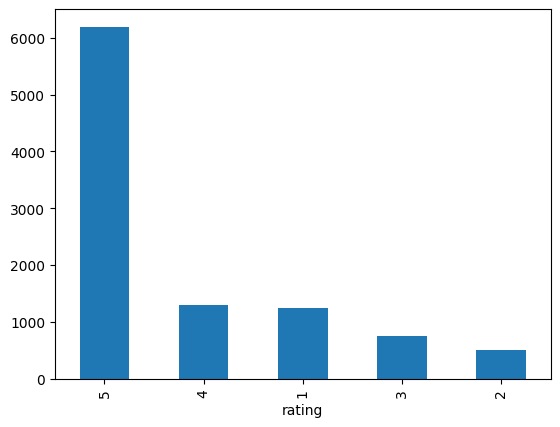

In [5]:
data.rating.value_counts().plot(kind='bar')

In [6]:
import huggingface_hub
print(huggingface_hub.__version__)

0.20.3


In [7]:
from huggingface_hub import HfApi
api = HfApi()
models = api.list_models(sort="downloads", direction=[-1], filter="sentiment-analysis")
model_data = pd.DataFrame(models)


In [8]:
model_data

,id,author,sha,created_at,last_modified,private,gated,disabled,downloads,likes,...,pipeline_tag,mask_token,card_data,widget_data,model_index,config,transformers_info,siblings,spaces,safetensors
0,pysentimiento/robertuito-sentiment-analysis,pysentimiento,c9045a75d17f43ce9452e4d2dd39e0583e06fe1e,2022-03-03 00:29:05+00:00,2024-02-27 21:46:41+00:00,False,False,None,164291461,47,...,None,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
1,lxyuan/distilbert-base-multilingual-cased-sent...,lxyuan,2e33845d25b3ed0c8994ed53adb72566a1d39d79,2023-05-05 16:22:55+00:00,2023-06-24 04:09:07+00:00,False,False,None,7789676,161,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
2,yiyanghkust/finbert-tone,yiyanghkust,4921590d3c0c3832c0efea24c8381ce0bda7844b,2022-03-03 00:29:05+00:00,2022-10-17 00:35:39+00:00,False,False,None,1561727,127,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
3,ProsusAI/finbert,ProsusAI,4556d13015211d73dccd3fdd39d39232506f3e43,2022-03-03 00:29:04+00:00,2023-05-23 12:43:35+00:00,False,False,None,1024546,485,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
4,finiteautomata/beto-sentiment-analysis,finiteautomata,9384c7f339a6d62c9e2e1d686f225f92e3a3353b,2022-03-03 00:29:05+00:00,2023-02-25 15:23:57+00:00,False,False,None,613927,23,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,ziffir/Text-Classification,ziffir,b7b0843df4c938b7bc0a7833053fe935d6db93ca,2024-01-08 10:44:00+00:00,2024-01-08 11:21:05+00:00,False,False,None,1,0,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
108,Ritvik19/sentinet-v1,Ritvik19,38f970a1b349076bf3aa97f065a7d0c53a3f550d,2022-05-24 08:17:47+00:00,2022-06-25 04:55:57+00:00,False,False,None,0,0,...,None,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
109,kitrak-rev/Airline-Sentiment-Classifier,kitrak-rev,a5e18aa903c8d66adfbab5c85efad81d5e8b438d,2022-12-25 00:25:23+00:00,2022-12-25 01:19:43+00:00,False,False,None,0,0,...,text-classification,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None
110,Mizuiro-sakura/Luke-finetuned-sentiment-analysis,Mizuiro-sakura,418f2c03d369a31d0b8c8e03f817b09023e68548,2022-12-27 01:14:54+00:00,2023-01-07 11:28:49+00:00,False,False,None,0,0,...,None,None,None,None,None,None,None,"[{'rfilename': '.gitattributes', 'size': None,...",None,None


In [9]:
from transformers import AutoTokenizer
tokenizer1 = AutoTokenizer.from_pretrained(model_data.id[1], max_length = 512, model_max_length=512, padding="max_length", truncation=True)
tokenizer2 = AutoTokenizer.from_pretrained(model_data.id[2], max_length = 512, model_max_length=512, padding="max_length", truncation=True)

In [10]:
import time

In [11]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
pipe1 = pipeline('sentiment-analysis', model=model_data.id[1], tokenizer=tokenizer1, device=0)

In [13]:
start = time.time()
data['sentiment1'] = data['text'][:10].apply(lambda x: pipe1(x, padding=True, truncation=True)[0]['label'])
end = time.time()
print(end - start)

0.3369739055633545


In [14]:
start = time.time()
data['sentiment1'] = data['text'][:100].apply(lambda x: pipe1(x, padding=True, truncation=True)[0]['label'])
end = time.time()
print(end - start)

/home/snow/anaconda3/envs/a2n/lib/python3.11/site-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0.3554408550262451


In [15]:
start = time.time()
data['sentiment1'] = data['text'].apply(lambda x: pipe1(x, padding=True, truncation=True)[0]['label'])
end = time.time()
print(end - start)

29.451730012893677


In [16]:
data

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment1
0,5,What can I say? ZELDA=Good,The origional LOZ was and still is my favorite...,[],B00006LELB,B001EYUNUS,AFFIEOFTPSVNDN6PUXSKMH6R5FTA,2003-04-11 04:54:29.000,0,False,negative
1,5,2K brings the heat back,2K has brought it back with this edition. I ha...,[],B07DM3LYVV,B07DM3LYVV,AGGCSGGNREYLZBOLWM4T4CDZ5APA,2018-09-27 20:18:26.184,0,False,positive
2,5,Awesome kit that requires some patience to ass...,It is very important to note that this device ...,[],B072V9ZBSK,B072V9ZBSK,AH4XXBOJTBYTQRQZHOLI5OY234KQ,2018-07-16 17:57:37.729,9,True,positive
3,5,Beautiful Graphics and Addicting Gameplay,Let me be the first to say that this is not a ...,[],B002Q21X7Y,B001EYUS2G,AERNB4ALIJQVM3XYK2NSHUWTVFSQ,2010-02-09 22:52:18.000,75,True,positive
4,3,There's something not right about this install...,"I know what it is now, IT'S ALMOST IMPOSSIBLE ...",[],B000066TS2,B000066TS2,AHMCFJYI3Q4OACQJ7AYV25LDIYIA,2002-10-28 05:09:04.000,2,False,negative
...,...,...,...,...,...,...,...,...,...,...,...
9995,5,amazing product very well made,Beautiful well made product. Looks to be made ...,[],B08C53MPNB,B08Y596T43,AEJSHIX5YWVY5VB45KXAC7K3CY2A,2020-08-21 17:17:34.347,1,True,positive
9996,5,Five Stars,I finished it and getting ready for second game,[],B015HAL2OK,B015KBXBM2,AGY4I2RVYOQVB76S42SUD42VSNQA,2016-08-07 03:37:28.000,0,True,positive
9997,5,This saved Christmas!,Two kids. Two new controllers. Both controller...,[],B01BI4ZWZE,B01BI4ZWZE,AHHY77W746FPQLUF6XWFPFOBCBOA,2019-04-17 15:47:12.140,0,True,positive
9998,5,Perfection,Amazing just amazing!,[],B00J8740YI,B00J8740YI,AFEBM3DBUN3WMYT4PFN3HYXUE3BQ,2017-01-14 18:06:38.000,0,True,positive


<Axes: xlabel='sentiment1'>

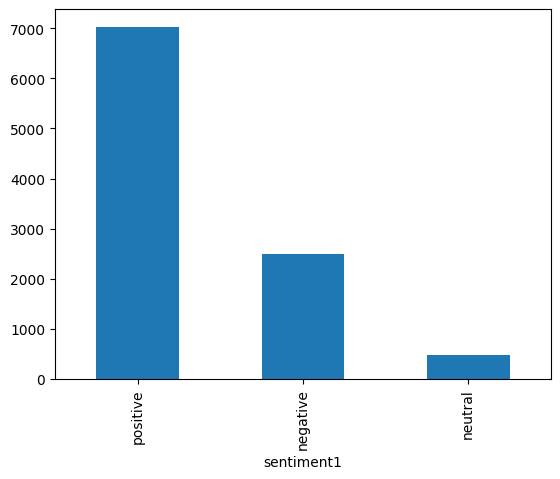

In [17]:
data.sentiment1.value_counts().plot(kind='bar')

<Axes: xlabel='sentiment1'>

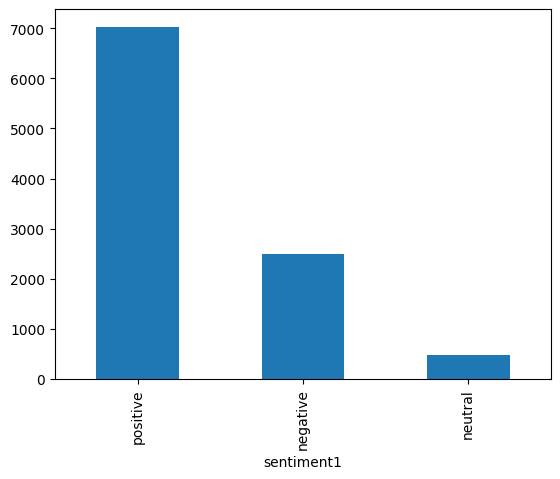

In [18]:
data.sentiment1.value_counts().plot(kind='bar')

In [19]:

data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x > 3 else 'neutral' if x == 3 else 'negative')


In [20]:
data

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment1,sentiment
0,5,What can I say? ZELDA=Good,The origional LOZ was and still is my favorite...,[],B00006LELB,B001EYUNUS,AFFIEOFTPSVNDN6PUXSKMH6R5FTA,2003-04-11 04:54:29.000,0,False,negative,positive
1,5,2K brings the heat back,2K has brought it back with this edition. I ha...,[],B07DM3LYVV,B07DM3LYVV,AGGCSGGNREYLZBOLWM4T4CDZ5APA,2018-09-27 20:18:26.184,0,False,positive,positive
2,5,Awesome kit that requires some patience to ass...,It is very important to note that this device ...,[],B072V9ZBSK,B072V9ZBSK,AH4XXBOJTBYTQRQZHOLI5OY234KQ,2018-07-16 17:57:37.729,9,True,positive,positive
3,5,Beautiful Graphics and Addicting Gameplay,Let me be the first to say that this is not a ...,[],B002Q21X7Y,B001EYUS2G,AERNB4ALIJQVM3XYK2NSHUWTVFSQ,2010-02-09 22:52:18.000,75,True,positive,positive
4,3,There's something not right about this install...,"I know what it is now, IT'S ALMOST IMPOSSIBLE ...",[],B000066TS2,B000066TS2,AHMCFJYI3Q4OACQJ7AYV25LDIYIA,2002-10-28 05:09:04.000,2,False,negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,amazing product very well made,Beautiful well made product. Looks to be made ...,[],B08C53MPNB,B08Y596T43,AEJSHIX5YWVY5VB45KXAC7K3CY2A,2020-08-21 17:17:34.347,1,True,positive,positive
9996,5,Five Stars,I finished it and getting ready for second game,[],B015HAL2OK,B015KBXBM2,AGY4I2RVYOQVB76S42SUD42VSNQA,2016-08-07 03:37:28.000,0,True,positive,positive
9997,5,This saved Christmas!,Two kids. Two new controllers. Both controller...,[],B01BI4ZWZE,B01BI4ZWZE,AHHY77W746FPQLUF6XWFPFOBCBOA,2019-04-17 15:47:12.140,0,True,positive,positive
9998,5,Perfection,Amazing just amazing!,[],B00J8740YI,B00J8740YI,AFEBM3DBUN3WMYT4PFN3HYXUE3BQ,2017-01-14 18:06:38.000,0,True,positive,positive


In [21]:
positive_data = data[data['sentiment'] == 'positive']
accuracy = (positive_data['sentiment1'] == 'positive').mean()
accuracy


0.8591267191881427

In [22]:
positive_data = data[data['sentiment'] == 'negative']
accuracy = (positive_data['sentiment1'] == 'negative').mean()
accuracy


0.7282546901648664

In [23]:
neutral_data = data[data['sentiment'] == 'neutral']
accuracy = (neutral_data['sentiment1'] == 'neutral').mean()
accuracy

0.10505319148936171

In [28]:
text1 = ["this a non sentence. I am not sure what to do with it.", "I am happy to be here"]


# zero shot clasification for text1
zero_shot_pipeline = pipeline(task="zero-shot-classification", model = "facebook/bart-large-mnli")    

candidate_labels = ["good review", "bad review"]

zeroshot = zero_shot_pipeline(text1, candidate_labels, truncation=True, padding=True)

In [33]:
zeroshot

[{'sequence': 'this a non sentence. I am not sure what to do with it.',
  'labels': ['bad review', 'good review'],
  'scores': [0.8390345573425293, 0.1609654426574707]},
 {'sequence': 'I am happy to be here',
  'labels': ['good review', 'bad review'],
  'scores': [0.9845084547996521, 0.015491543337702751]}]

In [39]:
# Apply zero-shot classification on data.text
zeroshot_results = zero_shot_pipeline(data['text'][:1000].tolist(), candidate_labels, truncation=True, padding=True)

# Extract the label with the larger score
data['custom'][:1000] = [result['labels'][result['scores'].index(max(result['scores']))] for result in zeroshot_results]


KeyboardInterrupt: 

In [ ]:
data

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment1,sentiment,custom
0,5,What can I say? ZELDA=Good,The origional LOZ was and still is my favorite...,[],B00006LELB,B001EYUNUS,AFFIEOFTPSVNDN6PUXSKMH6R5FTA,2003-04-11 04:54:29.000,0,False,negative,positive,good review
1,5,2K brings the heat back,2K has brought it back with this edition. I ha...,[],B07DM3LYVV,B07DM3LYVV,AGGCSGGNREYLZBOLWM4T4CDZ5APA,2018-09-27 20:18:26.184,0,False,positive,positive,good review
2,5,Awesome kit that requires some patience to ass...,It is very important to note that this device ...,[],B072V9ZBSK,B072V9ZBSK,AH4XXBOJTBYTQRQZHOLI5OY234KQ,2018-07-16 17:57:37.729,9,True,positive,positive,good review
3,5,Beautiful Graphics and Addicting Gameplay,Let me be the first to say that this is not a ...,[],B002Q21X7Y,B001EYUS2G,AERNB4ALIJQVM3XYK2NSHUWTVFSQ,2010-02-09 22:52:18.000,75,True,positive,positive,good review
4,3,There's something not right about this install...,"I know what it is now, IT'S ALMOST IMPOSSIBLE ...",[],B000066TS2,B000066TS2,AHMCFJYI3Q4OACQJ7AYV25LDIYIA,2002-10-28 05:09:04.000,2,False,negative,neutral,bad review
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,amazing product very well made,Beautiful well made product. Looks to be made ...,[],B08C53MPNB,B08Y596T43,AEJSHIX5YWVY5VB45KXAC7K3CY2A,2020-08-21 17:17:34.347,1,True,positive,positive,NaN
9996,5,Five Stars,I finished it and getting ready for second game,[],B015HAL2OK,B015KBXBM2,AGY4I2RVYOQVB76S42SUD42VSNQA,2016-08-07 03:37:28.000,0,True,positive,positive,NaN
9997,5,This saved Christmas!,Two kids. Two new controllers. Both controller...,[],B01BI4ZWZE,B01BI4ZWZE,AHHY77W746FPQLUF6XWFPFOBCBOA,2019-04-17 15:47:12.140,0,True,positive,positive,NaN
9998,5,Perfection,Amazing just amazing!,[],B00J8740YI,B00J8740YI,AFEBM3DBUN3WMYT4PFN3HYXUE3BQ,2017-01-14 18:06:38.000,0,True,positive,positive,NaN
